In [1]:
import cv2
import numpy as np
import os
import pandas as pd

# Function to process an image and classify based on color
def classify_image(image_path):
    infected_image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(infected_image, cv2.COLOR_BGR2HSV)
    hue_channel = hsv_image[:, :, 0]
    
    # Define thresholds for yellow, brown, and green colors in Hue space
    yellow_lower = 20
    yellow_upper = 30
    brown_lower = 10  # Adjust as needed
    brown_upper = 20  # Adjust as needed
    green_lower = 40
    green_upper = 70
    
    # Threshold the Hue channel to get yellow, brown, and green regions
    yellow_mask = cv2.inRange(hue_channel, yellow_lower, yellow_upper)
    brown_mask = cv2.inRange(hue_channel, brown_lower, brown_upper)
    green_mask = cv2.inRange(hue_channel, green_lower, green_upper)
    
    # Combine yellow and brown masks
    yellow_brown_mask = cv2.bitwise_or(yellow_mask, brown_mask)
    
    # Find contours in the masks
    yellow_brown_contours, _ = cv2.findContours(yellow_brown_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    green_contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize container arrays
    yellowBrownCon = []
    greenCon = []
    
    # Iterate through yellow-brown contours to get pixel coordinates
    for contour in yellow_brown_contours:
        for point in contour:
            x, y = point[0]
            yellowBrownCon.append((x, y))
    
    # Iterate through green contours to get pixel coordinates
    for contour in green_contours:
        for point in contour:
            x, y = point[0]
            greenCon.append((x, y))
    
    # Check if the number of yellow-brown contours is greater than green contours
    if len(yellowBrownCon) > len(greenCon):
        return 1  # Infected
    else:
        return 0  # Healthy

# Path to the dataset folders
base_path = "datasets-B"
healthy_path = os.path.join(base_path, "healthy")
infected_path = os.path.join(base_path, "infected")

# Initialize lists to store results
results = []

# Process healthy images
for filename in os.listdir(healthy_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(healthy_path, filename)
        result = classify_image(image_path)
        results.append((filename, result))

# Process infected images
for filename in os.listdir(infected_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(infected_path, filename)
        result = classify_image(image_path)
        results.append((filename, result))

# Save results to Excel
df = pd.DataFrame(results, columns=["Filename", "Classification"])
excel_path = "Yellow_plus_Brown.xlsx"
df.to_excel(excel_path, index=False)
print("Results saved to", excel_path)


Results saved to Yellow_plus_Brown.xlsx


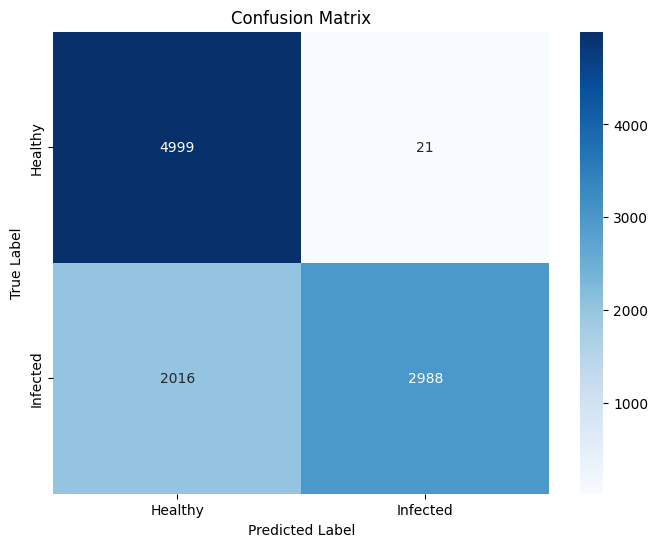

In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the classification results from the Excel file
excel_path = "Yellow_plus_Brown.xlsx"
df = pd.read_excel(excel_path)

# True labels: 0 for healthy, 1 for infected
true_labels = [0] * 5020 + [1] * 5004

# Predicted labels from the classification results
predicted_labels = df["Classification"].tolist()

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Infected"], yticklabels=["Healthy", "Infected"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


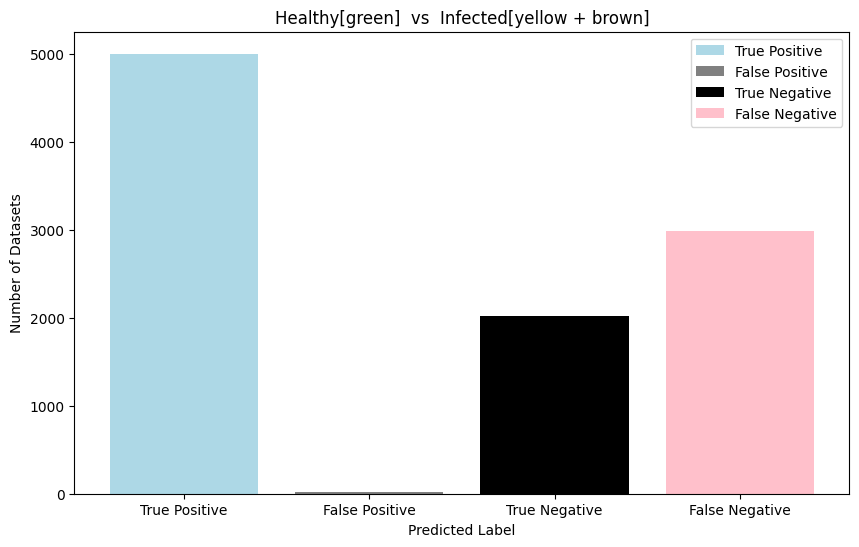

In [5]:
import matplotlib.pyplot as plt

# Define the new values
true_positive = 4999
false_positive = 21
true_negative = 2016
false_negative = 2988

# Create lists for the values and labels
values = [true_positive, false_positive, true_negative, false_negative]
labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']
colors = ['lightblue', 'gray', 'black', 'pink']  # Changed color for all bars to light blue

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel('Predicted Label')
plt.ylabel('Number of Datasets')
plt.title('Healthy[green]  vs  Infected[yellow + brown]')


# Add legend
plt.legend(bars, labels, loc='upper right')

plt.show()


In [6]:
# Calculate accuracy and precision
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
precision = true_positive / (true_positive + false_positive)

# Display the accuracy and precision
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.6998204309656824
Precision: 0.9958167330677291
